# _Python for Scientific Data Analysis_


#  Matplotlib

## Section 2: Subplots and Axes Configurations (continued)

In [1]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

### Moving Labels Around

In all the examples previously, we have the numbers, labels, andticks for the x and y axes in the same place: x at bottom and y on the left.  There will be times when we want to change that (see the rest of this lecture), and Matplotlib allows these changes rather painlessly.

First, let's move the **numbers** around.

To configure the number placement, the syntax is ``[name of the axis].tick_params(label[location]=True/False)``.  There are four locations: top, bottom, left, and right.   

E.g. for an axis named ``ax``, the following commmands have the following results:

``ax.tick_params(labelleft=True,labelbottom=True)`` the default

``ax.tick_params(labelbottom=False,labeltop=True)`` removes the number labeling from the bottom part of the x axis.  Adds the numbers to the top of the plot along the x axis

``ax.tick_params(labelleft=True,labelright=True)`` will have the y axis numbers along both the left and righthand sides of the plots.

Second, let's move the **ticks** around.

To configure the tick placement, you can also use ``[name of the axis].tick_params([location]=True/False)``.  E.g. as in the previous example, ``ax.tick_params(left=True,bottom=True)`` is the default while ``ax.tick_params(right=True,bottom=False,top=True)`` puts y ticks to the left (unchanged by default) and right (set to True) and the x ticks at the top

Third, let's move the **labels** around.

To configure you use ``set_label_position`` with the following syntax:  ``[name of axis].[xaxis or yaxis].set_label_position("[location]")``.   E.g. as in the previous example, ``ax.yaxis.set_label_position("right")`` moves the y axis label to the righthand side of the plot.

See the following examples ...

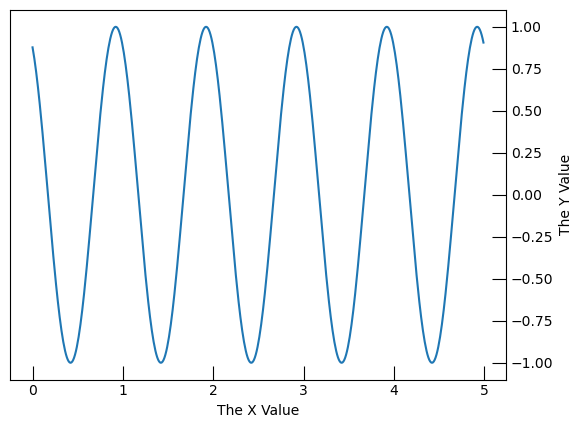

In [2]:
fig,ax=plt.subplots()

x=np.arange(0,5,0.01)

#plotting a simple cosine function

y=np.cos(2*np.pi*x+0.5)
ax.plot(x,y)

ax.set_xlabel(r'The X Value')
ax.set_ylabel(r'The Y Value')

#numbers removed from left, numbers added to right; no ticks on left, ticks on right
ax.tick_params(labelleft=False,labelright=True,left=False,right=True)

#some other stylistic stuff
ax.tick_params(which='major',direction='in',length=10)

#moved axis label -- The Y Value -- to the right
ax.yaxis.set_label_position("right")


plt.show()

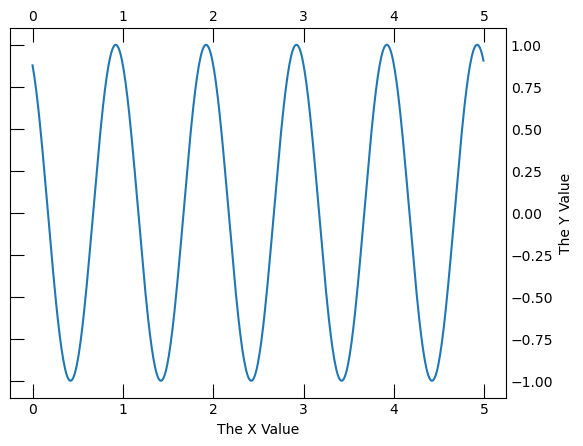

In [3]:
fig,ax=plt.subplots()

x=np.arange(0,5,0.01)

#plotting a simple cosine function

y=np.cos(2*np.pi*x+0.5)
ax.plot(x,y)

ax.set_xlabel(r'The X Value')
ax.set_ylabel(r'The Y Value')

#numbers on the left, numbers added to top, ticks added to the top, ticks removed from the bottom, numbers added to the right
# ticks on the left, no ticks on the right
#ax.tick_params(labelleft=True,labeltop=True,top=True,bottom=False,labelright=True,left=True,right=False)
ax.tick_params(labelleft=False,labeltop=True,top=True,bottom=True,labelright=True,left=True,right=False)
ax.tick_params(which='major',direction='in',length=10)
#ax.tick_params(right=True,bottom=False,top=True)
ax.yaxis.set_label_position("right")
#ax.tick_params(labelleft=False,labelright=True)
#ax.tick_params(labelleft=True,labelright=True)

#ax.yaxis.tick_right()

plt.show()

Now, that was the 'precise' way to move numbers and ticks around.   If you want something more streamlined, then there are a few options: first ``tick_left`` or ``tick_right`` works.

The syntax is: ``[name of axis].yaxis.[tick_left or tick_right]()`` or ``[name of axis].[xaxis].[tick_top or tick_bottom]``.  E.g. ``ax.yaxis.tick_right()`` moves the ticks and the numbers on the yaxis side to the right.

Second, you can do ``set_ticks_position`` which will just move the ticks: it has the advantage of allowing you to select ``both`` as an option.   See below ...

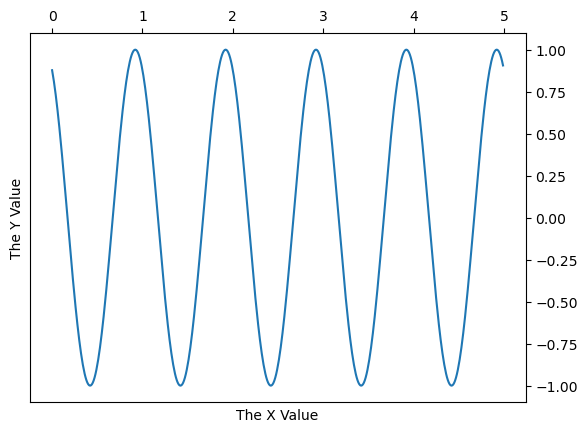

In [4]:
fig,ax=plt.subplots()

x=np.arange(0,5,0.01)

#plotting a simple cosine function

y=np.cos(2*np.pi*x+0.5)
ax.plot(x,y)

ax.set_xlabel(r'The X Value')
ax.set_ylabel(r'The Y Value')

ax.yaxis.tick_right()
ax.xaxis.tick_top()
#ax.yaxis.set_ticks_position("right")
#ax.yaxis.set_ticks_position("both") #comment this out to make the lefthand ticks disappear
#ax.yaxis.set_label_position("right")
#ax.xaxis.set_label_position("top")

plt.show()

### Twin Axes and Secondary Axes on a Plot

In all the examples previously, we have plotted data and a fit to the data with a single x and y axis on a given panel.  What if we want to plot different data/fits that has different units on the same panel?   Then we have to add a _**twin**_ axis.  Okay, but what if we want to plot the _same_ data but with different units?  Well, then we need a _**secondary**_ axis.  

#### _Twin Axes_


The key command for a twin axis is -- you guessed it -- employs the _**axes**_ container and uses a property called _twin[x,y]_: e.g. ``twin_axisx = axes.twinx()`` for a twin x axis on a given plot (i.e. you share the same x axis but are plotting different things along y).   ``twin_axisy = axes.twiny()`` is the command for a twin y axis.  

Here's two super simple examples:


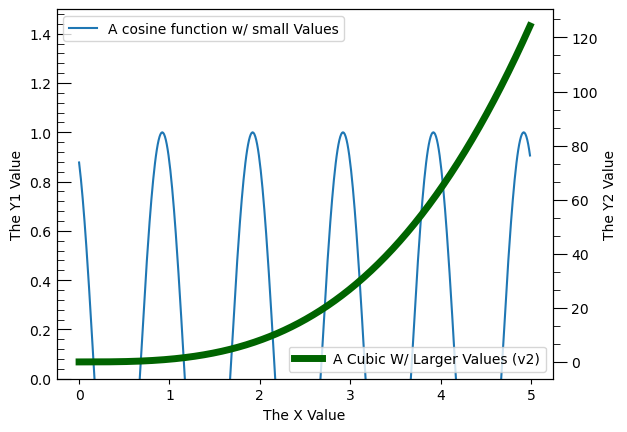

In [5]:
#twin x

fig,ax=plt.subplots()

x=np.arange(0,5,0.01)

#plotting a simple cosine function

y=np.cos(2*np.pi*x+0.5)


#plotting a cubic
y2=x**3


asecond_axisx=ax.twinx()

#the cosine function

#stuff with main plot
ax.plot(x,y,label='A cosine function w/ small Values',color='tab:blue')
ax.set_xlabel(r'The X Value')
ax.set_ylabel(r'The Y1 Value')
ax.tick_params(which='both',axis='y',direction='in')
ax.tick_params(which='major',axis='y',length=10)
ax.tick_params(which='minor',axis='y',length=5)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax.plot(x,y2,label='A Cubic W/ Larger Values (v1)',color='tab:orange')
ax.set_ylim(0,1.5*np.max(y))
ax.legend(loc='upper left')

#stuff with twin axis
asecond_axisx.plot(x,y2,label='A Cubic W/ Larger Values (v2)',color='darkgreen',linewidth=5)
asecond_axisx.set_xlabel(r'The X2 Value')
asecond_axisx.set_ylabel(r'The Y2 Value')
asecond_axisx.tick_params(which='both',axis='y',direction='out')
asecond_axisx.tick_params(which='major',axis='y',length=10)
asecond_axisx.tick_params(which='minor',axis='y',length=5)
asecond_axisx.yaxis.set_minor_locator(AutoMinorLocator(3))

asecond_axisx.tick_params(labeltop=True,labelbottom=False,labelright=True,labelleft=False)


asecond_axisx.legend(loc='lower right')



plt.show()

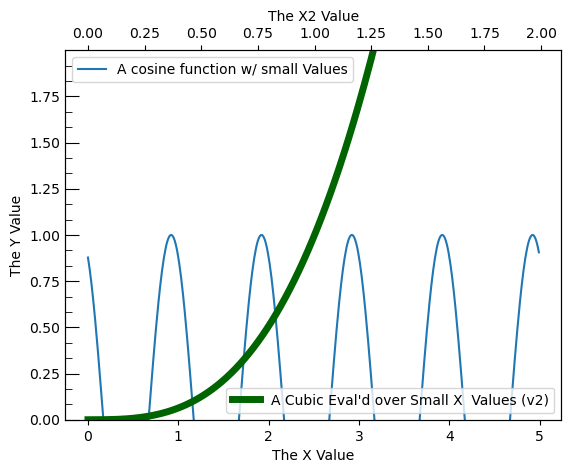

In [6]:
#twin y

fig,ax=plt.subplots()

#plotting a simple cosine function
x=np.arange(0,5,0.01)
x2=np.arange(0,2,0.01)
y=np.cos(2*np.pi*x+0.5)


#plotting a cubic
y2=x2**3


asecond_axisy=ax.twiny()

#the cosine function

#stuff with main plot
ax.plot(x,y,label='A cosine function w/ small Values',color='tab:blue')
ax.set_xlabel(r'The X Value')
ax.set_ylabel(r'The Y Value')
ax.tick_params(which='both',axis='y',direction='in')
ax.tick_params(which='major',axis='y',length=10)
ax.tick_params(which='minor',axis='y',length=5)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax.plot(x2,y2,label='A Cubic W/ Larger Values (v1)',color='tab:orange')
ax.set_ylim(0,2*np.max(y))
ax.legend(loc='upper left')

#stuff with twin axis
asecond_axisy.plot(x2,y2,label='A Cubic Eval\'d over Small X  Values (v2)',color='darkgreen',linewidth=5)
asecond_axisy.set_xlabel(r'The X2 Value')
asecond_axisy.set_ylabel(r'The Y2 Value')
asecond_axisy.tick_params(which='both',axis='y',direction='out')
asecond_axisy.tick_params(which='major',axis='y',length=10)
asecond_axisy.tick_params(which='minor',axis='y',length=5)
asecond_axisy.yaxis.set_minor_locator(AutoMinorLocator(3))


asecond_axisy.legend(loc='lower right')



plt.show()

#### More Detailed Example

Here's a more detailed example showing how the twin axes would actually be used.

Here, we are plotting CO2 concentration per year on the main axis.  On the twin axis, keep the x axis the same (years) but now go for "something completely different".

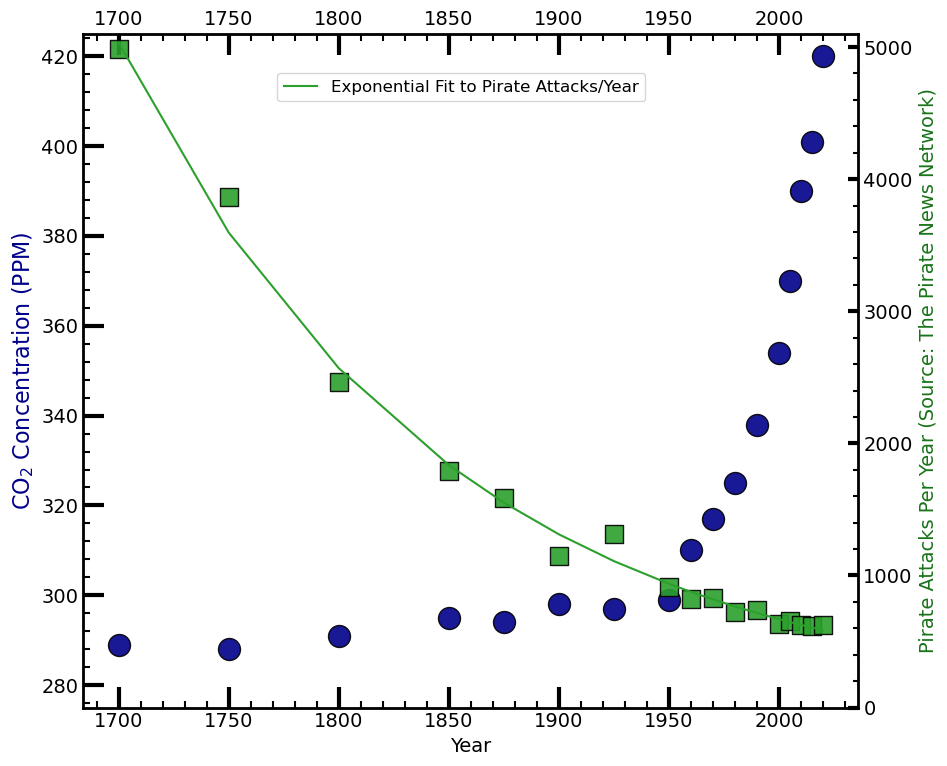

In [7]:
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

#generating data for main axis
CO2concentration=np.array([289,288,291,295,294,298,297,299,310,317,325,338,354,370,390.1,401,420]) #roughly estimated from NOAA
CO2years=np.array([1700,1750,1800,1850,1875,1900,1925,1950,1960,1970,1980,1990,2000,2005,2010,2015,2020])


#data for twin axis
sval=0.25 #add some noise to the number of pirate attacks/year
pirate_attacks=5000*np.exp(-1*(CO2years-CO2years[0])/150)*(1+sval*0.25*np.random.randn(len(CO2years)))

fig,axes=plt.subplots(figsize=(8*1.25,7*1.25))


 #now fit an exponential to the pirate attacks
piratefit=np.polyfit(CO2years,np.log(pirate_attacks),1)

atest=np.exp(piratefit[1])
btest=piratefit[0]

axes.scatter(CO2years,CO2concentration,marker='o',s=250,color='darkblue',edgecolor='black',alpha=0.9,label='CO2')
axes.set_xlabel('Year',fontsize=14)
axes.set_ylabel(r'CO$_{\rm 2}$ Concentration (PPM)',fontsize=16,color='darkblue')

axes.set_ylim(275,425)



#adds the x axis numbers and ticks to the top of the plot
#axes.xaxis.tick_top()
#axes.xaxis.set_label_position("top")
#axes.xaxis.set_label_position("bottom")


axes.xaxis.set_ticks_position('both') #adds the major and minor ticks to the top
axes.tick_params(labeltop=True) #adds the number labels at the top

axes.tick_params(which='both',width=1.5,direction='in',labelsize=14)
axes.tick_params(which='major',length=15,width=3)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))

#thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)

####THIS IS THE KEY LINE

axes2=axes.twinx()

axes2.tick_params(which='both',direction='in',labelsize=14)
axes2.set_ylim(0,5100)

axes2.scatter(CO2years,pirate_attacks,marker='s',s=150,color='tab:green',edgecolor='black',alpha=0.9)

axes2.plot(CO2years,atest*np.exp(btest*CO2years),ls='-',label='Exponential Fit to Pirate Attacks/Year',color='tab:green',)
axes2.set_ylabel(r'Pirate Attacks Per Year (Source: The Pirate News Network)',fontsize=14,color='darkgreen',alpha=0.9)

axes2.legend(loc=[0.25,0.9],fontsize='large',markerscale=0.85)

#axes2.tick_params(right=True,labelright=False) #adds ticks but not numbers


axes2.tick_params(which='major',length=7,width=3)
axes2.tick_params(which='minor',length=3.5,width=1.5)
#axes2.xaxis.set_ticks_position('both')
#axes2.xaxis.set_minor_locator(AutoMinorLocator(15)) this will override the previous minor tick spacing in the main plot ...

#axes2.yaxis.set_ticks_position('right') 
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))



#fig.tight_layout() #note: see what this does

# plt.show()

#![](./code/sect2/figures/Ex2_5.png)

#### _Secondary Axes_

The key command for a secondary axis also employs the _**axes**_ container and uses a property called _secondary\_[x,y]axis_.   

The full API is here: [https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary\_axis.html]().  For now, though, there are a few key items that you will widely need to set.  First, you need to tell where this axis will be drawn ('top','bottom','left','right').   Second, it's not enough to declare a secondary axis: you need to tell it how the numbers _map_ to the primary axis.  This is done through a _function_ keyword and an associated inverse function.  

There are different ways of defining a _function_ for use with secondary axes here.  Two options include 1) calling a separation function (i.e. a separate _def_ program) and its inverse or 2) using a _lambda_ function and its inverse (easiest if you can do this in one line).

For example, if you have two axes -- one of which is degrees (main) and another is radians(secondary), then you can define a _def_ that contains the following lines:

```
def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi
```

and you can use this to create a secondary axis in this example ...

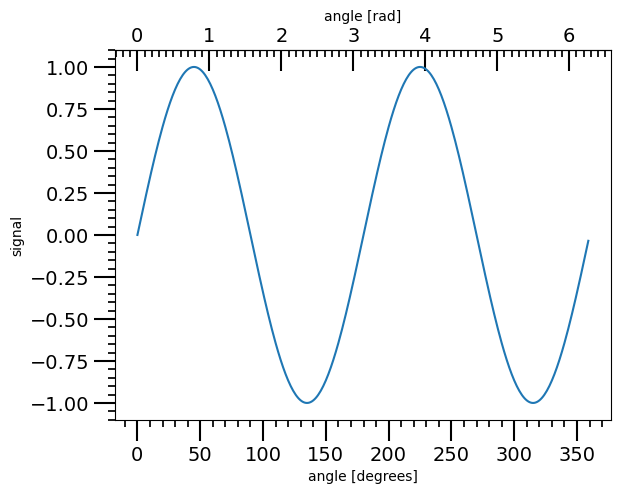

In [27]:
fig, ax = plt.subplots()
x = np.arange(0, 360, 1) #array of degrees
y = np.sin(2 * x * np.pi / 180) #y values
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
#ax.set_title('Sine wave')

ax.tick_params(which='both',width=1.5,direction='out',labelsize=14)
ax.tick_params(which='major',length=15,width=1.5)
ax.tick_params(which='minor',length=5,width=1.25)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


sec_ax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
#OR
#sec_ax = ax.secondary_xaxis('top', functions=(lambda x: x*np.pi/180, lambda x: x*180/np.pi))
sec_ax.set_xlabel('angle [rad]')

sec_ax.tick_params(which='both',width=1.5,direction='in',labelsize=14)
sec_ax.tick_params(which='major',length=15,width=1.5)
sec_ax.tick_params(which='minor',length=5,width=1.25)
sec_ax.xaxis.set_minor_locator(AutoMinorLocator(10))
sec_ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()


***Caution*** though ...

Imagine if you are transforming from wavelength to frequency, you might be tempted to think that you should define something like these two functions...

```
def wvlh2freq(wvlh):
 #if wvlh is in microns
 c=2.9979e14 #microns/s
 return c/wvlh

#the inverse function
def freq2wvlh(freq):
 #if frequency is in Hz
 c=2.9979e14 #microns/s
 # return wvlh in microns
 return c/freq
``` 

Nope, because the original equation is proportion to 1/x (so 1/x is its own inverse).  [yes, this is a bit weird ...]

#### A More Complex Example


The following is an example where we plot contrast vs separation for several planet imaging (extreme AO) instruments, reading in an input text file for SCExAO/CHARIS, estimating improved performance later through some function trickery, and comparing to a conventional AO imaging system.  Here, the secondary axis is projected physical separation, which we figure out given an assumed distance to our hypothetical star of 40 pc.

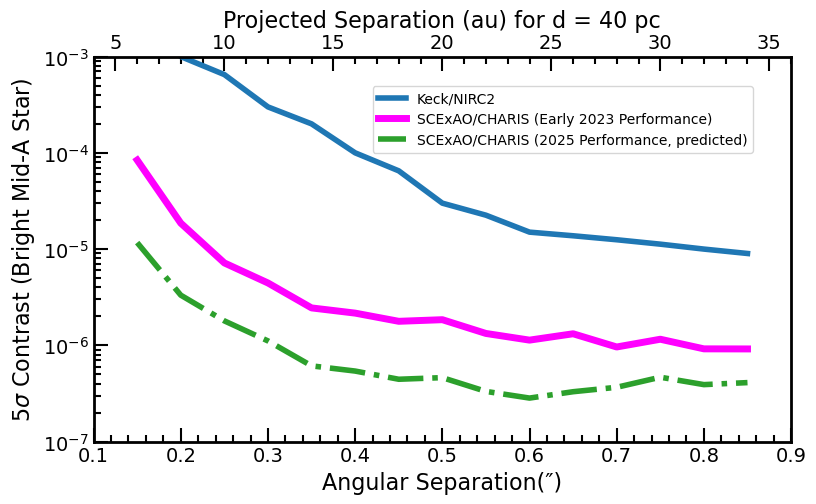

In [10]:
###(Ex_2.6)

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator
from scipy import interpolate

 #array of angular separations

file_in='./files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
 #a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


 #approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
 #print(fkeck)
 #exit()
contrast_5sig_keck=fkeck(ang_sep_new)
 #estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

fig,axes=plt.subplots(figsize=(9,5))

axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2025 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(1e-7,1e-3)
axes.set_xlim(0.1,0.9)

#note: setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
   #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14)
axes.tick_params(which='major',length=10,width=1.5)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 #log scale automatically sets minor tick marks to be reasonable here

#note: setting this to 'both' would make contrast numbers appear on left and right side of plot
axes.yaxis.set_ticks_position('left')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=16)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=16)

###IMPORTANT LINES
secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=16)
secondaxis.tick_params(which='both',direction='in',labelsize=14)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))

 #thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)
axes.legend(loc=[0.4,0.75])

# plt.show()

#![](./code/sect2/figures/Ex2_6.png)

#### Labels on both sides

In the above examples we shown how to move the location of numbers, ticks, and labels around.  As a refresher:

- **numbers** (label[position]) ``ax.tick_params(labelleft=True,labelright=True)`` will have the y axis numbers along both the left and righthand sides of the plots.
- **ticks** ([position]) ``ax.tick_params(right=True,bottom=False,top=True)`` puts y ticks to the left (unchanged by default) and right (set to True) and the x ticks at the top
- **labels** (set_label_position("[position]") ``ax.yaxis.set_label_position("right")`` moves the y axis label to the righthand side of the plot.
  
  We have also shown how to use the secondaryaxis and twinaxis functions.  E.g.:

- **secondary_[x,y]axis** -- If *x* is the value of a function in degrees, then ``sec_ax = ax.secondary_xaxis('top', functions=(lambda x: x*np.pi/180, lambda x: x*180/np.pi))`` will produce a secondary_xaxis at the top to plot the x value in radians.

- **twin[x,y]()** If ax is some axis, then ``axes2=ax.twinx()`` will allow you to plot data with the same range of x values but a different y value.  E.g. if on ax you do a scatter plot of CO2 concentration per year -- ``ax.scatter(year,CO2concentration)`` -- then ``axes2.scatter(year,pirate_attacks)`` will also plot the number of pirate attacks per year (an entirely different thing than CO2 concentration(!) on the same figure panel.

We also saw how you can put the ticks and numbers on both sides of a plot. E.g. x axis numbers on both the top and bottom sides requires ``ax.tick_params(labelbottom=True,labeltop=True)``; you can put x and y axis ticks on all sides by ``ax.tick_params(left=True,right=True,bottom=True,top=True)``.

How about putting the labels on both sides?  Unfortunately, this is a bit more convoluted.  E.g. there is no ax.yaxis_set_label_position("both") function (this will trigger a syntax error).  However, you can 1) do this manually to get all four.  We will hold off on 1) for now (it is dealt with below with annotation).    If you just want the labels on both sides of either the x or y axes you can use ``secondary_[x,y]axis`` or ``twin[x,y]()`` to do this.  

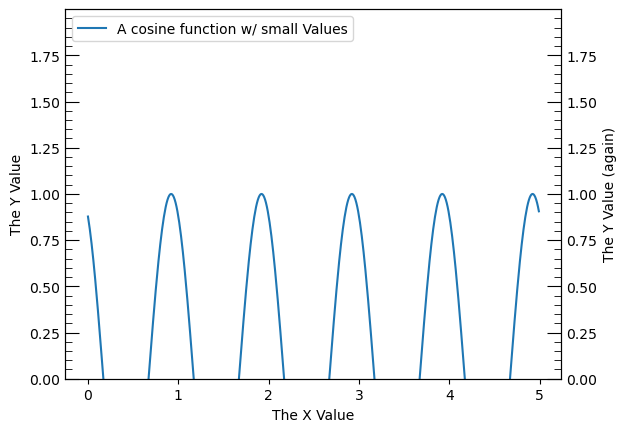

In [19]:
fig,ax=plt.subplots()

#plotting a simple cosine function
x=np.arange(0,5,0.01)
x2=np.arange(0,2,0.01)
y=np.cos(2*np.pi*x+0.5)


#plotting a cubic
y2=x2**3


#asecond_axisy=ax.twiny()

#the cosine function

#stuff with main plot
ax.plot(x,y,label='A cosine function w/ small Values',color='tab:blue')
ax.set_xlabel(r'The X Value')
ax.set_ylabel(r'The Y Value')
ax.tick_params(which='both',axis='y',direction='in')
ax.tick_params(which='major',axis='y',length=10)
ax.tick_params(which='minor',axis='y',length=5)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax.plot(x2,y2,label='A Cubic W/ Larger Values (v1)',color='tab:orange')
ax.set_ylim(0,2*np.max(y))
ax.legend(loc='upper left')


# Create a twin axis sharing the x-axis
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())  # Match the y-limits
ax2.set_ylabel(r'The Y Value (again)')  # Set right-side label

#formatting the tick params as before
ax2.tick_params(which='both',axis='y',direction='in')
ax2.tick_params(which='major',axis='y',length=10)
ax2.tick_params(which='minor',axis='y',length=5)
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))


plt.show()

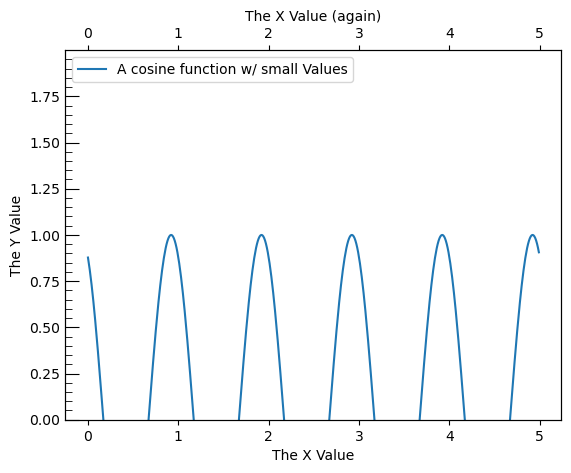

In [20]:
#for the x axis ...

fig,ax=plt.subplots()

#plotting a simple cosine function
x=np.arange(0,5,0.01)
x2=np.arange(0,2,0.01)
y=np.cos(2*np.pi*x+0.5)


#plotting a cubic
y2=x2**3


#asecond_axisy=ax.twiny()

#the cosine function

#stuff with main plot
ax.plot(x,y,label='A cosine function w/ small Values',color='tab:blue')
ax.set_xlabel(r'The X Value')
ax.set_ylabel(r'The Y Value')
ax.tick_params(which='both',axis='y',direction='in')
ax.tick_params(which='major',axis='y',length=10)
ax.tick_params(which='minor',axis='y',length=5)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax.plot(x2,y2,label='A Cubic W/ Larger Values (v1)',color='tab:orange')
ax.set_ylim(0,2*np.max(y))
ax.legend(loc='upper left')


# Create a twin axis sharing the x-axis
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())  # Match the x-limits
ax2.set_xlabel(r'The X Value (again)')  # Set right-side label

#formatting the tick params
ax2.tick_params(which='both',axis='y',direction='in')
ax2.tick_params(which='major',axis='y',length=10)
ax2.tick_params(which='minor',axis='y',length=5)


plt.show()

### Insets

You can also produce inset plots (plots within plots): the required commands within _matplotlib_ slightly differ depending on what you are trying to do.

Case 1: to just generate a plot-within-a-plot, you still need the ``plt.subplots()`` call initially to define the _fig_ and _axes_ containers.  To add a second plot _within_ a plot, you can call ``inset_figure=fig.add_axes([location and dimensions])``.   Here the numbers in brackets should refer to the starting x, starting y, width, and height of this inset plot.  E.g. ``left,bottom,width,height=[0.5,0.5,0.33,0.25]``.   Note that the units here are in relative dimensions of the entire plot (e.g. as seen in ``plt.show()``).   

Case 2: there are cases where you want the inset to be a _zoom-in_ of the primary plot: not plotting a separate thing.   In this case, the _matplotlib_ calls are different.     The call then is ``inset_figure=axes.inset_axes([x,y,width,height])`` and finally ``axes.indicate_inset_zoom(secondaxis)`` to show this second plot as a zoom-in of the major plot.

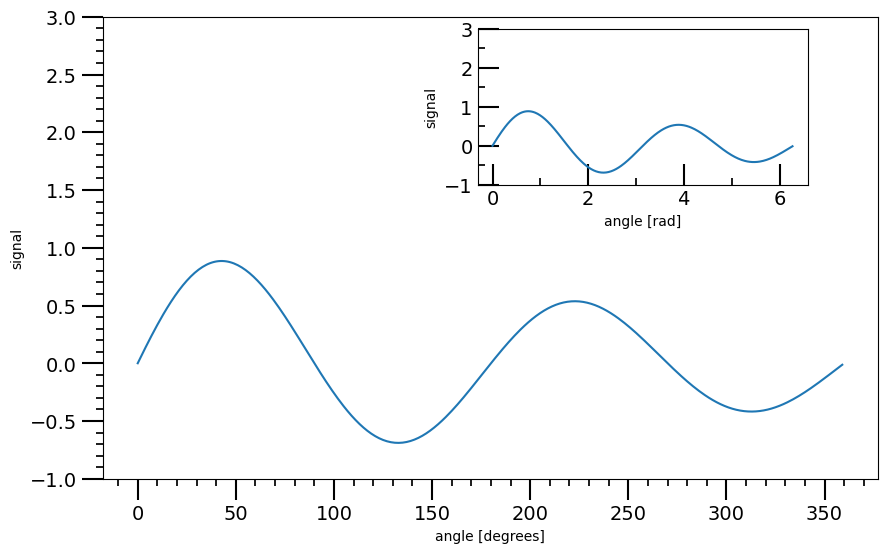

In [11]:


fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(0, 360, 1) #array of degrees
#y = np.sin(((2 * x * np.pi)+np.pi) / 180) #y values
y = np.sin( 2 * x * np.pi / 180)*np.exp(-1*x/360) #y values

ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
#ax.set_title('Sine wave')

ax.tick_params(which='both',width=1.5,direction='out',labelsize=14)
ax.tick_params(which='major',length=15,width=1.5)
ax.tick_params(which='minor',length=5,width=1.25)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylim(-1,3)

def deg2rad(x):
    return x * np.pi / 180

###IMPORTANT LINES

left,bottom,width,height=[0.5,0.6,0.33,0.26]

sec_ax=fig.add_axes([left,bottom,width,height])

sec_ax.set_ylabel('signal')
sec_ax.set_xlabel('angle [rad]')

sec_ax.plot(deg2rad(x),y)

sec_ax.set_ylim(-1,3)
sec_ax.tick_params(which='both',width=1.5,direction='in',labelsize=14)
sec_ax.tick_params(which='major',length=15,width=1.5)
sec_ax.tick_params(which='minor',length=5,width=1.25)
sec_ax.xaxis.set_minor_locator(AutoMinorLocator(2))
sec_ax.yaxis.set_minor_locator(AutoMinorLocator(2))


plt.show()

Below are two more examples from the SCExAO plots above: Case 1) we create an inset plot and redo the x and y axes to plot projected separation in au and contrast in magnitudes, respectively and Case 2) we create an inset plot that is a zoom-in. 

    

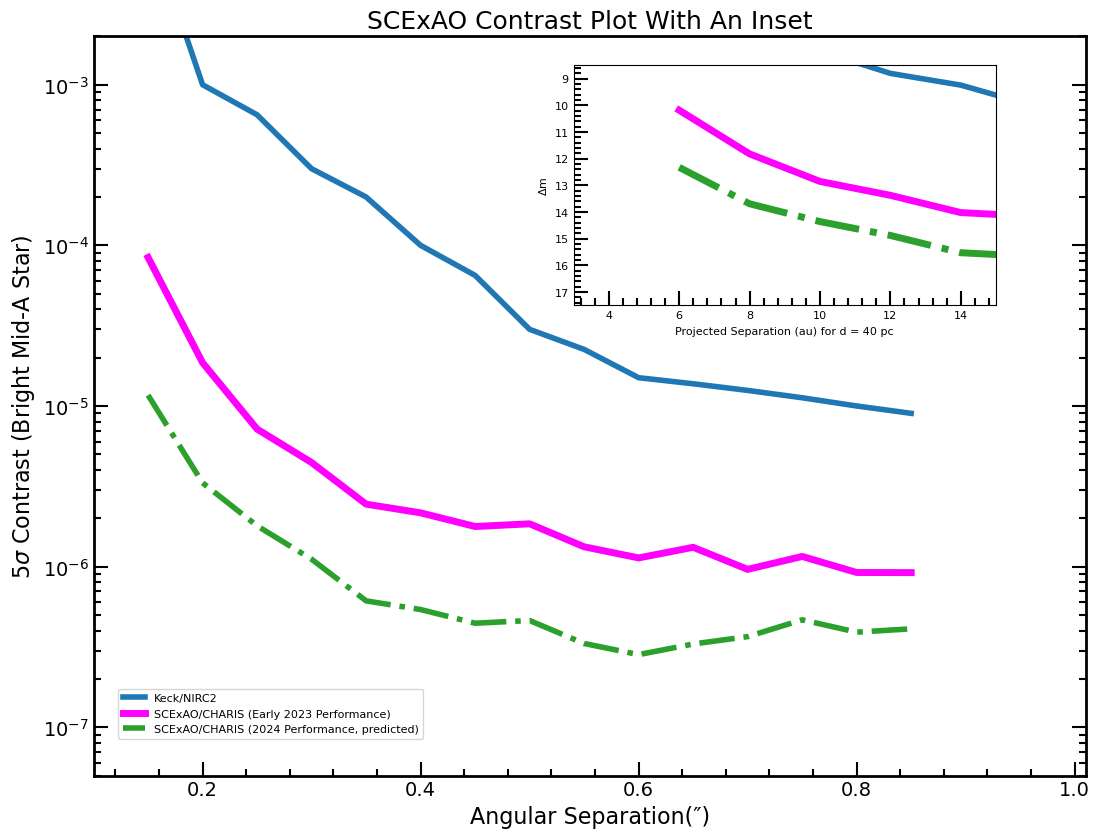

In [12]:
### Case 1(Ex_2.7)


# import matplotlib.pyplot as plot
# import numpy as np
# from scipy import interpolate
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator,LogLocator

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
 #a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


 #approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
 #print(fkeck)
 #exit()
contrast_5sig_keck=fkeck(ang_sep_new)
 #estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

fig,axes=plt.subplots(figsize=(12.8,9.6))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note: setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
   #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14)
axes.tick_params(which='major',length=10,width=1.5)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 #log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=16)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=16)
axes.set_title('SCExAO Contrast Plot With An Inset',fontsize=18)

###IMPORTANT LINES

left,bottom,width,height=[0.5,0.6,0.33,0.25]
secondaxis=fig.add_axes([left,bottom,width,height])
 

secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_keck),linewidth=4,markersize=np.sqrt(50),color='tab:blue')
secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_twohours),linewidth=5,color='magenta')
secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_twohours_new),ls='-.',linewidth=5,color='tab:green')
secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=8)
secondaxis.set_ylabel(r'$\Delta$m',fontsize=8)
secondaxis.set_xlim(3,15)
secondaxis.set_ylim(17.5,8.5)
secondaxis.tick_params(which='both',direction='in',labelsize=8)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))
secondaxis.yaxis.set_minor_locator(AutoMinorLocator(5))

 #thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)

 #new legend location to avoid clashes
axes.legend(loc=[0.025,0.05],fontsize=8)

# plt.show()

#![](./code/sect2/figures/Ex2_7.png)

If the inset is using the same units as the primary axis (i.e. the inset is "zooming in") ... you can use ``axes.indicate_inset_zoom([secondaxis])`` to denote where on the main plot the zoomed-in region refers to.

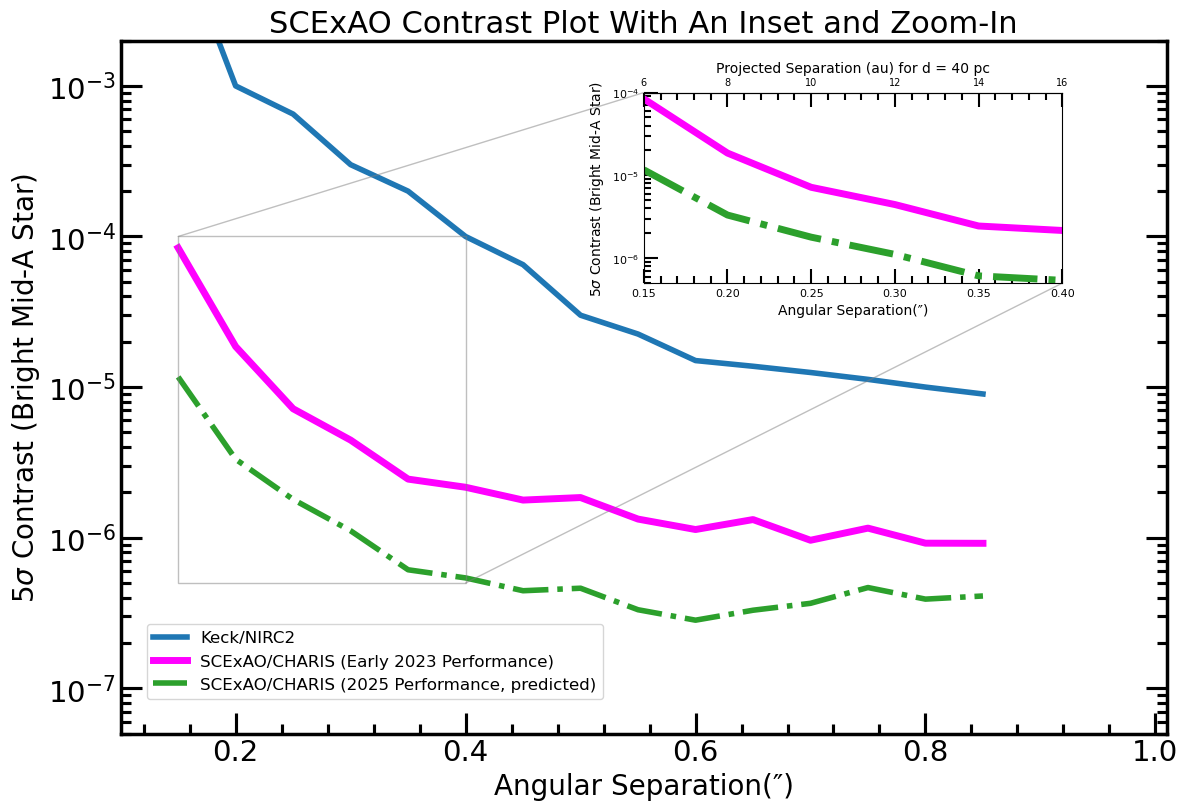

In [13]:
### Case 2(Ex_2.8)


# import matplotlib.pyplot as plot
# import numpy as np
# from scipy import interpolate
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator,LogLocator



#import matplotlib.pyplot as plt
#import numpy as np

#from scipy import interpolate
#from mpl_toolkits.axes_grid.inset_locator import inset_axes
#from matplotlib.ticker import AutoMinorLocator


file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
#a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


#approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
#print(fkeck)
#exit()
contrast_5sig_keck=fkeck(ang_sep_new)
#estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

scale=1.5
fig,axes=plt.subplots(figsize=(9*scale,6*scale))
#fig,axes=plt.subplots(figsize=(12.8,9))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2025 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note:setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
  #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14*scale)
axes.tick_params(which='major',length=10*scale,width=1.5*scale)
axes.tick_params(which='minor',length=5*scale,width=1.5*scale)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
#log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=20)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=20)
axes.set_title('SCExAO Contrast Plot With An Inset and Zoom-In',fontsize=22)

###IMPORTANTLINES

#secondaxis=inset_axes(axes,width=1.3,height=0.9,[0.5,0.6])
#secondaxis=axes.inset_axes([0.625, 0.65, 0.33, 0.25])
secondaxis=axes.inset_axes([0.5, 0.65, 0.4, 0.275]) #looks better in jupyter notebooks
#,width=1.3,height=0.9)
#left,bottom,width,height=[0.5,0.6,0.33,0.25]
#secondaxis=fig.add_axes([left,bottom,width,height])
#secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

secondaxis.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta')
secondaxis.plot(ang_sep_new,contrast_5sig_twohours_new,ls='-.',linewidth=5,color='tab:green')
secondaxis.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=10)
secondaxis.set_xlabel('Angular Separation(\u2033)',fontsize=10)
secondaxis.set_xlim(0.15,0.4)
secondaxis.set_ylim(5e-7,1e-4)
#secondaxis.set_ylim(5e-8,2e-3)
secondaxis.tick_params(which='both',direction='in',labelsize=8)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))
#secondaxis.yaxis.set_minor_locator(AutoMinorLocator(5))
secondaxis.set_yscale('log')

secondary_axis2=secondaxis.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))
secondary_axis2.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=10)
secondary_axis2.tick_params(which='both',direction='in',labelsize=7)
secondary_axis2.tick_params(which='major',length=10,width=1.5)
secondary_axis2.tick_params(which='minor',length=5,width=1.5)
secondary_axis2.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.indicate_inset_zoom(secondaxis)

for axl in ['top','bottom','left','right']:
  axes.spines[axl].set_linewidth(2.5)

axes.legend(loc=[0.025,0.05],fontsize=12)

### Annotations

You can annotate a plot with text and arrows.  For simple text markup, the most straightforward way is to use ``axes.text(x,y,text,ha=ha,va=va,transform=transform``, which has accepts x and y positions, your text, vertical and horizontal alignment (ha, va), and a mapping between the coordinates and the plot (transform).  Note "transform" can correspond to axis coordinates or data coordinates depend on what you set.  The API for _text_ is here [https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.text.html]().

Arrows are common markers.  The most straightforward way to draw an arrow is with ``axes.arrow(x,y,dx,dy,width=width,transform=transform,color=color,fill=[True/False])``, where the full API is given here:
[https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.arrow.html]().   Note there are fancy ways of overplotting a _circle_  but to me the simplest way is to call ``axes.scatter`` and setting the color to 'none' and symbol size _s_ to a large number.

For something more involved, ``axes.annotate`` is what you want.  The API for _annotate_ is here: [https://matplotlib.org/stable/api/_as\_gen/matplotlib.pyplot.annotate.html]() . It can accept text and properties for arrows connecting the text to the end points, usually with a dictionary of values for the arrow properties.   One of the key ones is the _connectionstyle_ property, which will allow you to draw different kinds of connecting lines with an arrowhead at the end.  The API for connection styles is here: [https://matplotlib.org/stable/gallery/userdemo/connectionstyle\_demo.html]()

If we simply want to write something, then ``axes.text`` will work.  Note here the syntax is

``axes.text([x location],[y location],[string],ha=[horizontal alignment],va=[vertical alignment])``.

The full range of annotations you can do is quite vast, see here: [https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html]() .  For example ...

``ax.arrow(3,2,1,1,arrowprops=dict(color='red',arrowstyle="-->",connectionstyle=angle3,angleA=0,angleB=-90``, will draw a curved arrow from [x,y]=(3,2) with x and y lengths of 1.

Below, we draw two arrows using ``arrow`` and ``annotate`` and add some text annotation.

(-2.0, 2.0)

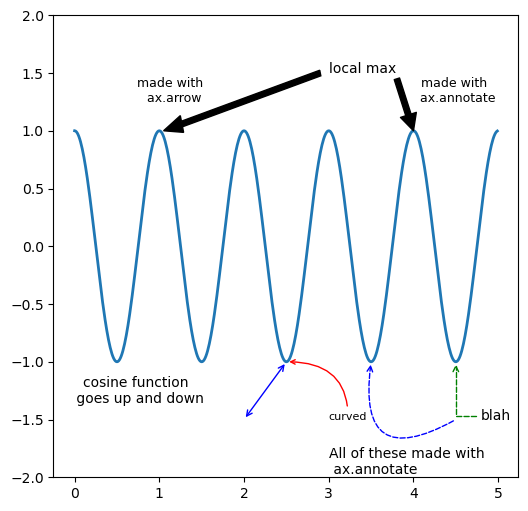

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(4, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.0))
ax.arrow(2.9,1.5,-1.85,-0.5,width=0.05,length_includes_head=True,color='black',fill=True)

#using annotate to make arrows
ax.annotate("curved",xytext=(3,-1.5),xy=(2.5,-1),fontsize=8,
               arrowprops=dict(color='red',arrowstyle="->",connectionstyle="angle3,angleA=90,angleB=0"))
ax.annotate("",xytext=(2.,-1.5),xy=(2.5,-1),
                arrowprops=dict(color='blue',arrowstyle="<->",connectionstyle="arc,angleA=0,angleB=-0"))
ax.annotate("",xytext=(4.5,-1.5),xy=(3.5,-1),
                arrowprops=dict(color='blue',arrowstyle="->",linestyle='--',connectionstyle="arc3,rad=-1"))
ax.annotate("blah",xytext=(4.8,-1.5),xy=(4.5,-1),
                 arrowprops=dict(color='green',arrowstyle="->",linestyle='--',connectionstyle="angle,angleA=0,angleB=-90"))
#ax.annotate("",xytext=(3,-1.5),xy=(2.5,-1),arrowprops=dict(facecolor='red',arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
#ax.arrow(3,2,1,1,arrow_props=dict(facecolor='red'))
#,arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
         
ax.text(0.75,-1.25, 'cosine function \n goes up and down',ha='center',va='center')
ax.text(1.15,1.35, 'made with \n ax.arrow',ha='center',va='center',fontsize=9)
ax.text(4.5,1.35, 'made with \n ax.annotate',ha='center',va='center',fontsize=9)
ax.text(3,-2,'All of these made with \n ax.annotate',ha='left',va='bottom',fontsize=10)
#ax.text(0.75,-1.25, 'made with ax.annotate',ha='center',va='center')
ax.set_ylim(-2, 2)

#here, "shrink" = move the tip and base some percent away from the annotated point and text

Here is one modification to our previous plot that illustrates several different kinds of annotations: simple text, _annotate_ with just a straight line (done three times), _arrow_, and _annotate_ done once with a complex connection style.

                                                                                                                          

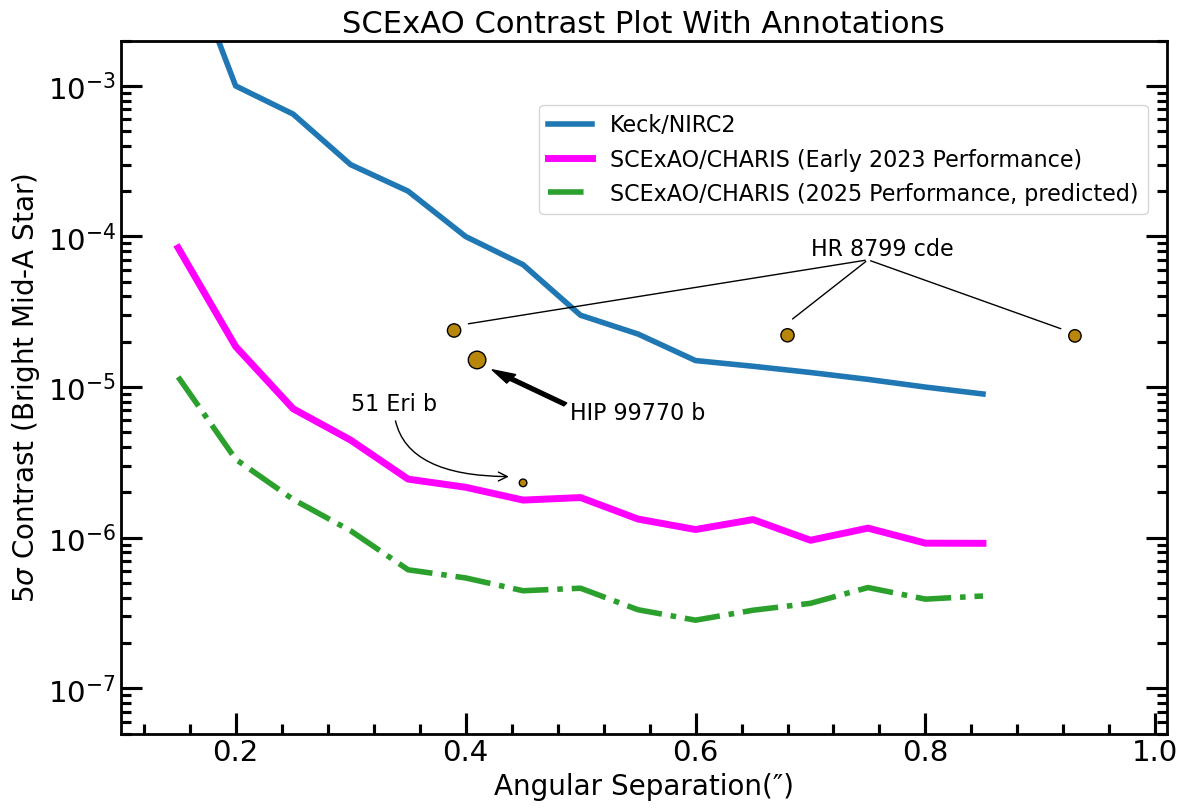

In [15]:
#Ex 2.9

from scipy import interpolate


###start: "bunch of math"
file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
#a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


#approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
#print(fkeck)
#exit()
contrast_5sig_keck=fkeck(ang_sep_new)
#estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

### end: bunch of math

scale=1.5
fig,axes=plt.subplots(figsize=(9*scale,6*scale))
#fig,axes=plt.subplots(figsize=(12.8,9))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2025 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note:setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
  #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14*scale)
axes.tick_params(which='major',length=10*scale,width=1.5*scale)
axes.tick_params(which='minor',length=5*scale,width=1.5*scale)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
#log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=20)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=20)
axes.set_title('SCExAO Contrast Plot With Annotations',fontsize=22)

###IMPORTANTLINES
###IMPORTANTLINES
#secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

#secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=16)
#secondaxis.tick_params(which='both',direction='in',labelsize=14)
#secondaxis.tick_params(which='major',length=10,width=1.5)
#secondaxis.tick_params(which='minor',length=5,width=1.5)
#secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))

#thicken the spines
for axl in ['top','bottom','left','right']:
  axes.spines[axl].set_linewidth(2)

axes.legend(loc=[0.4,0.75],fontsize=16)

planetnames=['HR 8799 e','HR 8799 d','HR 8799 c','51 Eri b','HIP 99770 b']
planetcontrast=10**(-0.4*(np.array([11.56,11.64,11.65,14.09,12.05])))
planetseps=np.array([0.39,0.68,0.93,0.45,0.41])
planetmass=np.array([9.2,9,8,3,16])

labeloffsetsx=np.array([0.01,0.0025,-0.01,-0.01,0.01])
labeloffsetsy=np.array([1.1,1.25,1.1,1.1,1.1])


axes.scatter(planetseps,planetcontrast,color='darkgoldenrod',edgecolor='black',s=100*planetmass/10,zorder=15)

#HR 8799 bcd labeling
axes.text(0.7,7.5e-5,'HR 8799 cde', fontsize=16)

for i in range(0,3):
 axes.annotate("",xy=(planetseps[i]+labeloffsetsx[i],labeloffsetsy[i]*planetcontrast[i]),xytext=(0.75,7.e-5),textcoords='data',arrowprops=dict(arrowstyle='-',facecolor='black'))

#HIP99770 b labeling

#note:we had to use transform=axes.transAxes because the y axis is a log plot.
axes.arrow(0.425,0.475,-0.07,0.05,width=0.005,transform=axes.transAxes,length_includes_head=True,color='black',fill=True)

#indata coordinates
#axes.text(0.55,6.8e-6,'HIP 99770 b',transform=axes.transData,ha='center',va='center',fontsize=16)
axes.text(0.55,6.8e-6,'HIP 99770 b',ha='center',va='center',fontsize=16)

#51Eri b
axes.annotate("51 Eri b",xy=(planetseps[-2]+labeloffsetsx[-2],
             labeloffsetsy[-2]*planetcontrast[-2]),xytext=(0.3,7e-6),
               textcoords='data',arrowprops=dict(arrowstyle='->',facecolor='black',
                connectionstyle="angle3,angleA=90,angleB=0"),fontsize=16);

